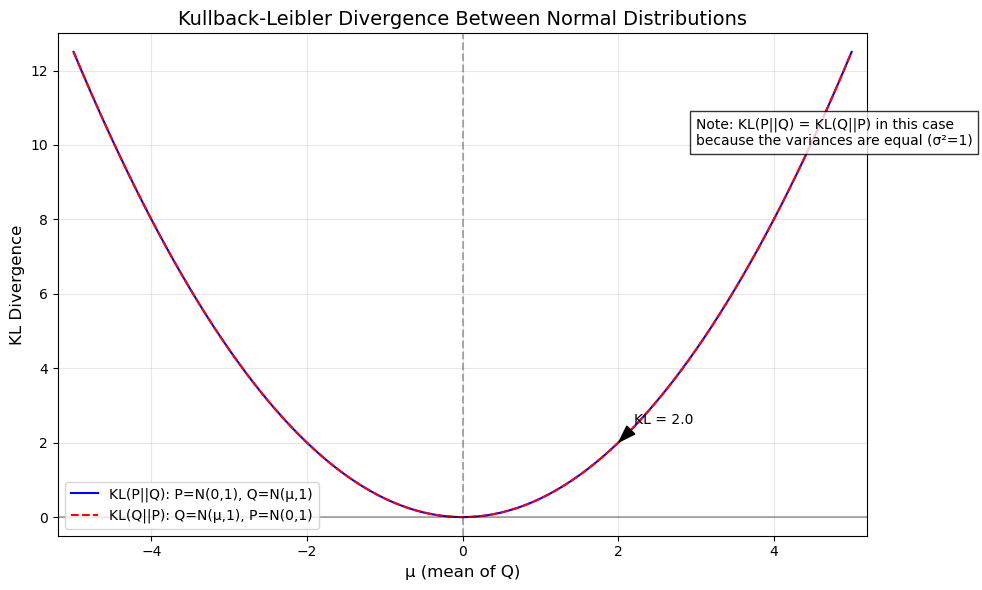

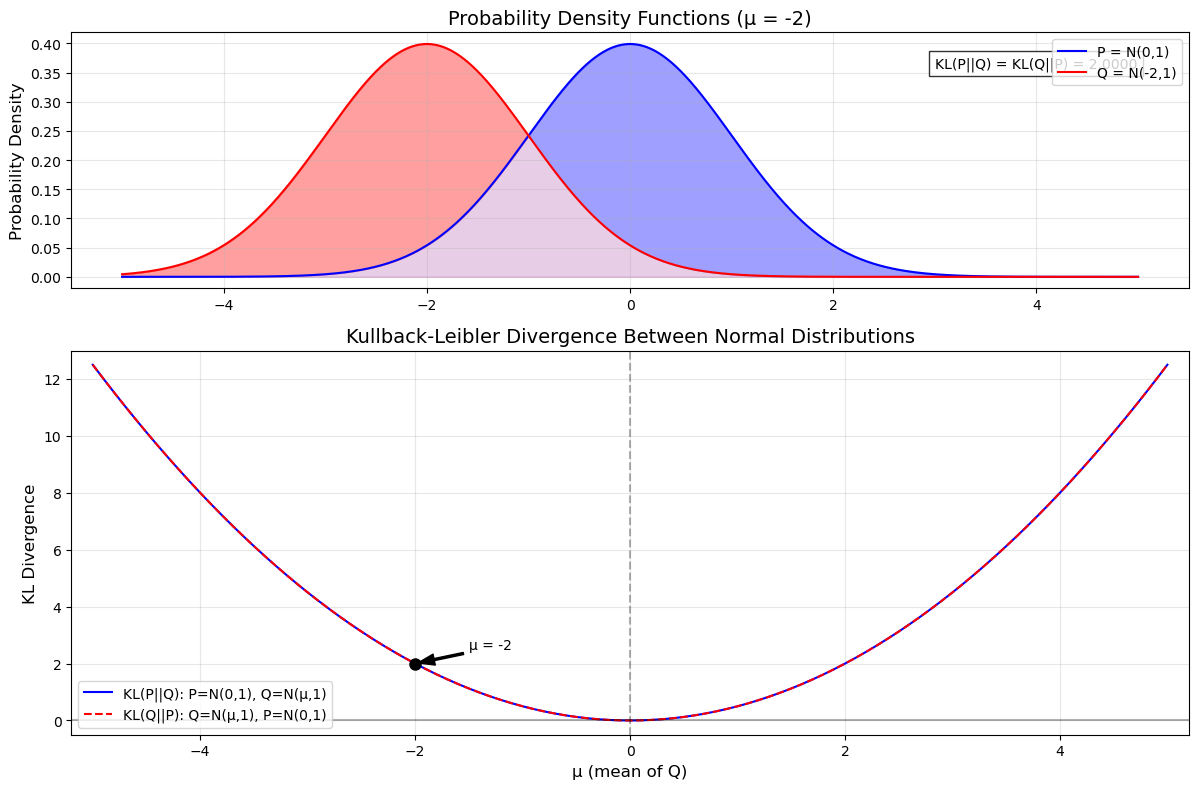

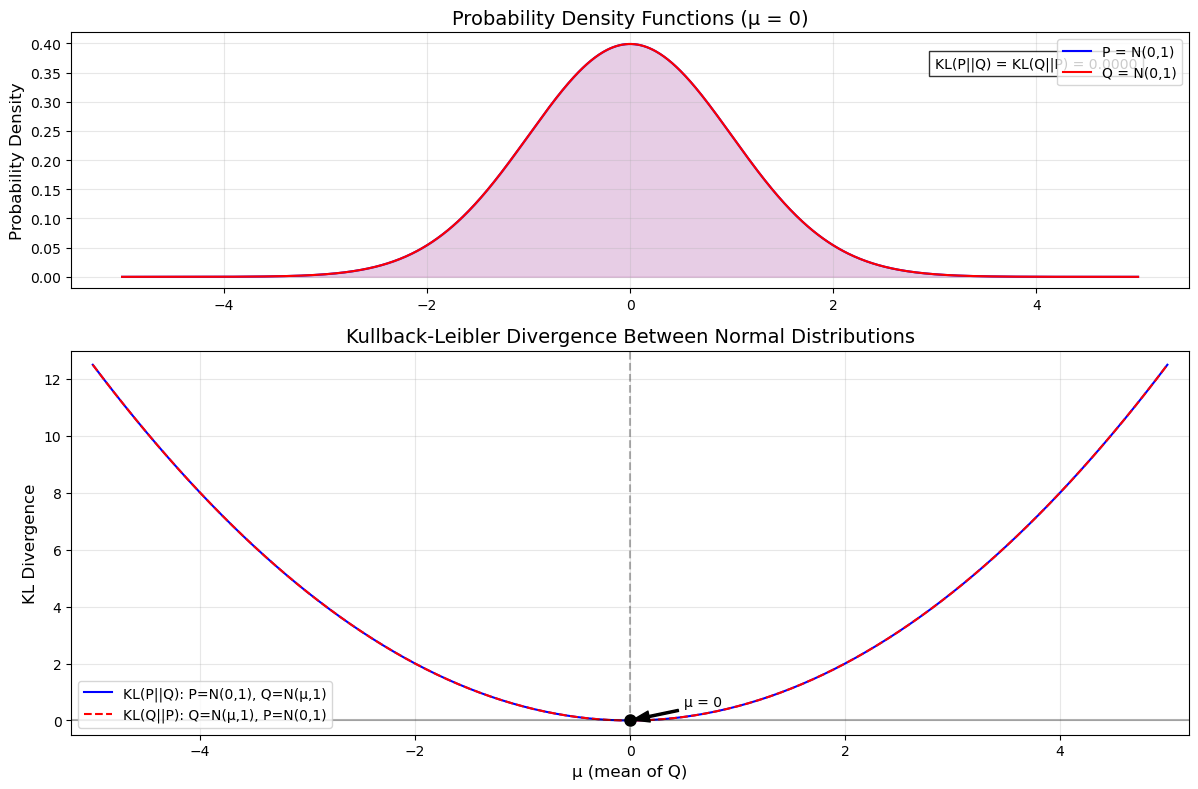

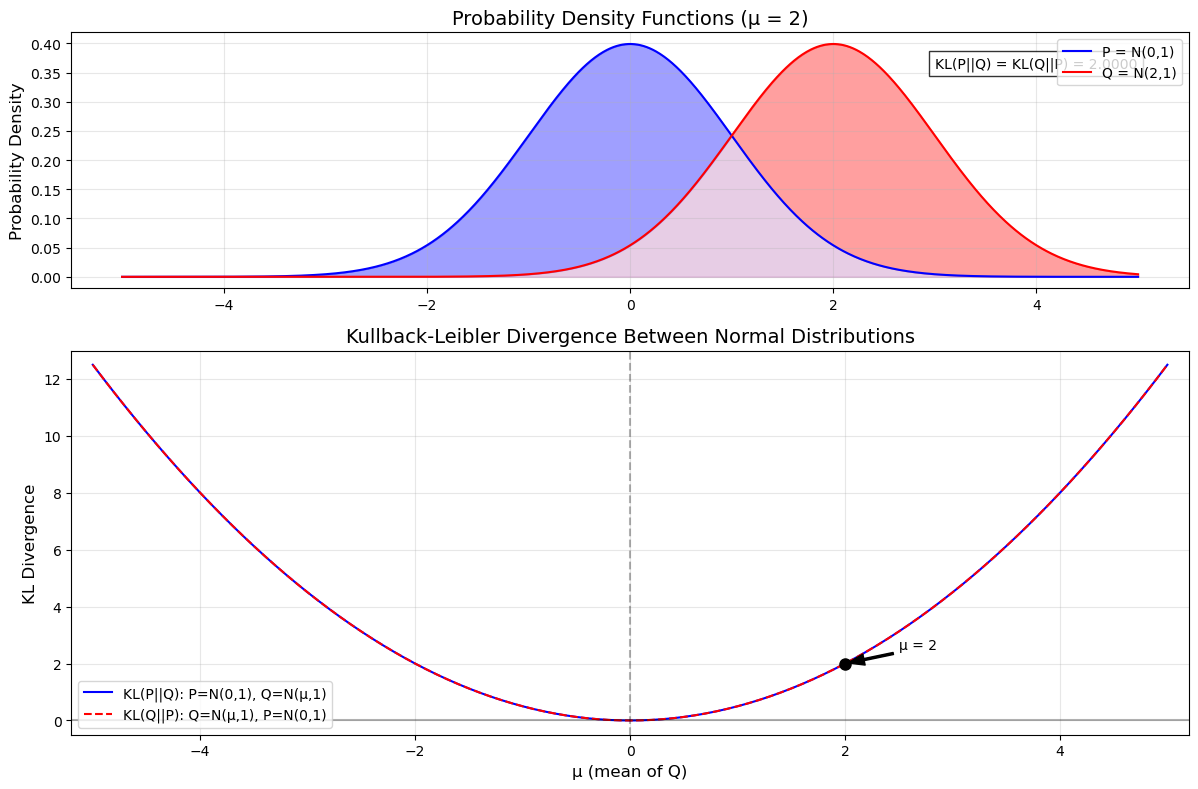

Sample KL divergence values:
μ	KL(P||Q)	KL(Q||P)
-3	4.5000		4.5000
-2	2.0000		2.0000
-1	0.5000		0.5000
0	0.0000		0.0000
1	0.5000		0.5000
2	2.0000		2.0000
3	4.5000		4.5000


interactive(children=(FloatSlider(value=2.0, description='mu', max=5.0, min=-5.0), Output()), _dom_classes=('w…

Use the slider to adjust the mu value and see how the distributions and KL divergence change.

Verification for μ = 2.5:
Using simplified formula: KL(P||Q) = 3.1250
Using general formula: KL(P||Q) = 3.1250

Mathematical explanation:
For normal distributions with equal variances (σ²=1):
KL(P||Q) = KL(N(0,1)||N(μ,1)) = (0-μ)²/(2×1) = μ²/2
KL(Q||P) = KL(N(μ,1)||N(0,1)) = (μ-0)²/(2×1) = μ²/2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.gridspec import GridSpec

# Define the range of μ values
mu_values = np.arange(-5, 5.1, 0.1)  # From -5 to 5 with step 0.1

# Function to calculate KL divergence from P = N(0,1) to Q = N(mu,1)
def kl_p_to_q(mu):
    """
    Calculate KL(P||Q) where:
    P = N(0,1)
    Q = N(mu,1)
    
    For normal distributions with same variance σ²=1:
    KL(P||Q) = (μ₁ - μ₂)²/(2σ²) = μ²/2 when μ₁=0, μ₂=mu, σ²=1
    """
    return mu**2 / 2

# Function to calculate KL divergence from Q = N(mu,1) to P = N(0,1)
def kl_q_to_p(mu):
    """
    Calculate KL(Q||P) where:
    Q = N(mu,1)
    P = N(0,1)
    
    For normal distributions with same variance σ²=1:
    KL(Q||P) = (μ₂ - μ₁)²/(2σ²) = μ²/2 when μ₂=mu, μ₁=0, σ²=1
    """
    return mu**2 / 2

# Calculate KL divergences for each μ value
kl_p_to_q_values = [kl_p_to_q(mu) for mu in mu_values]
kl_q_to_p_values = [kl_q_to_p(mu) for mu in mu_values]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot both KL divergences
plt.plot(mu_values, kl_p_to_q_values, 'b-', label='KL(P||Q): P=N(0,1), Q=N(μ,1)')
plt.plot(mu_values, kl_q_to_p_values, 'r--', label='KL(Q||P): Q=N(μ,1), P=N(0,1)')

# Add vertical lines to show symmetry around μ=0
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Add horizontal line at KL=0
plt.axhline(y=0, color='k', alpha=0.3)

# Customize the plot
plt.title('Kullback-Leibler Divergence Between Normal Distributions', fontsize=14)
plt.xlabel('μ (mean of Q)', fontsize=12)
plt.ylabel('KL Divergence', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Add text explaining the special case
plt.text(3, 10, 'Note: KL(P||Q) = KL(Q||P) in this case\nbecause the variances are equal (σ²=1)', 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Optional: Annotate some specific points
plt.annotate(f'KL = {kl_p_to_q(2):.1f}', xy=(2, kl_p_to_q(2)), xytext=(2.2, kl_p_to_q(2)+0.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))

# Show grid and set axis limits
plt.xlim(-5.2, 5.2)
plt.ylim(-0.5, 13)

# Display the KL divergence plot
plt.tight_layout()

# Create a function to plot both distributions for a given mu value
def plot_distributions(mu_value):
    x = np.linspace(-5, 5, 1000)
    p_x = norm.pdf(x, 0, 1)  # P = N(0,1)
    q_x = norm.pdf(x, mu_value, 1)  # Q = N(mu,1)
    
    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(2, 1, height_ratios=[1, 1.5], figure=fig)
    
    # Plot 1: Probability distributions
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(x, p_x, 'b-', label='P = N(0,1)')
    ax1.plot(x, q_x, 'r-', label=f'Q = N({mu_value},1)')
    ax1.fill_between(x, 0, p_x, color='blue', alpha=0.1)
    ax1.fill_between(x, 0, q_x, color='red', alpha=0.1)
    ax1.set_title(f'Probability Density Functions (μ = {mu_value})', fontsize=14)
    ax1.set_ylabel('Probability Density', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot the area where P > Q differently to visualize divergence
    high_p_indices = p_x > q_x
    ax1.fill_between(x[high_p_indices], q_x[high_p_indices], p_x[high_p_indices], 
                    color='blue', alpha=0.3, label='P > Q')
    
    # Plot the area where Q > P differently
    high_q_indices = q_x > p_x
    ax1.fill_between(x[high_q_indices], p_x[high_q_indices], q_x[high_q_indices], 
                    color='red', alpha=0.3, label='Q > P')
    
    # Annotation for KL divergence value at this mu
    kl_value = mu_value**2 / 2
    ax1.text(3, max(np.max(p_x), np.max(q_x)) * 0.9, 
             f'KL(P||Q) = KL(Q||P) = {kl_value:.4f}',
             bbox=dict(facecolor='white', alpha=0.8))
    
    # Plot 2: KL Divergence
    ax2 = fig.add_subplot(gs[1])
    ax2.plot(mu_values, kl_p_to_q_values, 'b-', label='KL(P||Q): P=N(0,1), Q=N(μ,1)')
    ax2.plot(mu_values, kl_q_to_p_values, 'r--', label='KL(Q||P): Q=N(μ,1), P=N(0,1)')
    ax2.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    ax2.axhline(y=0, color='k', alpha=0.3)
    ax2.set_title('Kullback-Leibler Divergence Between Normal Distributions', fontsize=14)
    ax2.set_xlabel('μ (mean of Q)', fontsize=12)
    ax2.set_ylabel('KL Divergence', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Highlight the current mu value on the KL plot
    ax2.plot(mu_value, kl_value, 'ko', markersize=8)
    ax2.annotate(f'μ = {mu_value}', xy=(mu_value, kl_value), 
                xytext=(mu_value + 0.5, kl_value + 0.5),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
    
    # Set axis limits
    ax2.set_xlim(-5.2, 5.2)
    ax2.set_ylim(-0.5, 13)
    
    plt.tight_layout()
    plt.show()

# Plot distributions for a few interesting mu values
for mu in [-2, 0, 2]:
    plot_distributions(mu)

# Print some sample values for verification
print("Sample KL divergence values:")
print("μ\tKL(P||Q)\tKL(Q||P)")
for mu in [-3, -2, -1, 0, 1, 2, 3]:
    print(f"{mu}\t{kl_p_to_q(mu):.4f}\t\t{kl_q_to_p(mu):.4f}")

# Add an interactive visualization option for seeing different mu values
def create_interactive_visualization():
    from ipywidgets import interact, FloatSlider
    
    @interact(mu=FloatSlider(min=-5.0, max=5.0, step=0.1, value=2.0))
    def update(mu):
        plot_distributions(mu)
    
    print("Use the slider to adjust the mu value and see how the distributions and KL divergence change.")

# Uncomment the line below to enable interactive visualization in Jupyter notebook
create_interactive_visualization()

# Optional: Verify with a more general formula
# The general formula for KL divergence between two normal distributions
# KL(N(μ₁,σ₁²)||N(μ₂,σ₂²)) = log(σ₂/σ₁) + (σ₁² + (μ₁-μ₂)²)/(2σ₂²) - 1/2

def general_kl(mu1, sigma1_sq, mu2, sigma2_sq):
    """Calculate KL divergence between N(μ₁,σ₁²) and N(μ₂,σ₂²)"""
    return (np.log(np.sqrt(sigma2_sq)/np.sqrt(sigma1_sq)) + 
            (sigma1_sq + (mu1-mu2)**2)/(2*sigma2_sq) - 0.5)

# Testing with our specific case
test_mu = 2.5
kl_specific = kl_p_to_q(test_mu)
kl_general = general_kl(0, 1, test_mu, 1)

print(f"\nVerification for μ = {test_mu}:")
print(f"Using simplified formula: KL(P||Q) = {kl_specific:.4f}")
print(f"Using general formula: KL(P||Q) = {kl_general:.4f}")

# Mathematical explanation of the simplification
print("\nMathematical explanation:")
print("For normal distributions with equal variances (σ²=1):")
print("KL(P||Q) = KL(N(0,1)||N(μ,1)) = (0-μ)²/(2×1) = μ²/2")
print("KL(Q||P) = KL(N(μ,1)||N(0,1)) = (μ-0)²/(2×1) = μ²/2")